# LOCALLY WEIGHTED

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Data Set Preparations:

def getData(m):
    X = np.random.rand(m,1)
    noise = np.random.rand(m,1)
    Y = 3*X**5 - X**4 - 12*X**2 + 7*X + 2 + .3*noise
    print(noise.shape)
    Y = Y.reshape((m,))
    return X,Y

In [4]:
X,Y = getData(100)

(100, 1)


In [5]:
print(X.shape)
print(Y.shape)

(100, 1)
(100,)


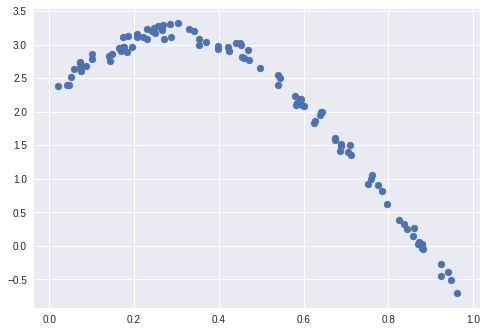

In [6]:
plt.style.use("seaborn")
plt.scatter(X,Y)
plt.show()

In [7]:
def getW(X,q,tau):
    
    m = X.shape[0]
    W = np.eye(m)
    
    for i in range(m):
        W[i,i] = np.exp(-np.dot((X[i]-q),(X[i]-q).T)/(2*tau*tau))
        
    return W

def getTheta(X,Y,q,tau):
    
    m = X.shape[0]
    ones = np.ones((m,1))
    X = np.hstack((ones,X))
    W = getW(X,q,tau)
    Y = Y.reshape((-1,1))
    q = np.array([1,q])
    
    theta = np.dot(np.linalg.pinv(np.dot(np.dot(X.T,W),X)),np.dot(np.dot(X.T,W),Y))
    return theta,W
                   

In [8]:
theta, W = getTheta(X,Y,0.6,1)

In [9]:
print(theta.shape)
print(W)

(2, 1)
[[0.86922526 0.         0.         ... 0.         0.         0.        ]
 [0.         0.91318632 0.         ... 0.         0.         0.        ]
 [0.         0.         0.91836399 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.92280775 0.         0.        ]
 [0.         0.         0.         ... 0.         0.92226681 0.        ]
 [0.         0.         0.         ... 0.         0.         0.92174112]]


In [10]:
X_Test = np.linspace(0,1,10)
print(X_Test)
Y_Test = []

for xt in X_Test:
    theta,W = getTheta(X,Y,xt,0.1)
    pred = theta[0][0] + theta[1][0]*xt
    Y_Test.append(pred)
    
Y_Test = np.array(Y_Test)
print(Y_Test.shape)
print(Y_Test)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
(10,)
[ 2.3581852   2.75937577  3.04070992  3.03844188  2.7847409   2.30350642
  1.62695546  0.80665931 -0.06918441 -0.95517515]


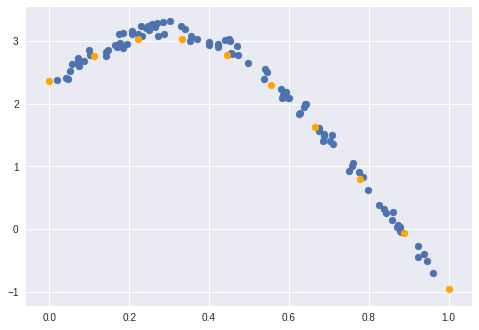

In [11]:
plt.scatter(X,Y)
plt.scatter(X_Test, Y_Test,c='orange')
plt.show()